In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

In [2]:
import scienceplots
import scienceplots
plt.style.use([
    'default',
    # 'science',
    'acp',
    # 'sp-grid',
    'no-black',
    'no-latex',
    'illustrator-safe'
])


In [3]:
def make_fn(variable, season1, season2, comment='', relplot = False, distplot=False):
    _x = variable.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'delta_percentile_{season1}_{season2}_{_x}{comment}.png'
    if relplot:
        return plot_path_relplot/f
    if distplot:
        return plot_path_distplot/f

    return plot_path /f


plot_path = Path('Plots')
plot_path.mkdir(parents=True, exist_ok=True) 


In [4]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
            }
di_mod2cases = mod2cases.copy()

In [5]:
models_and_obs =  models + ['Observations'] 
models_and_obs

['ECHAM-SALSA', 'NorESM', 'EC-Earth', 'UKESM', 'Observations']

In [6]:
season_atto = 'FMA'
season_smr = 'JA'


In [7]:
dic_station2season = dict(
    SMR=season_smr,
    ATTO=season_atto,
)
dic_station2nicename= dict(
    SMR='SMEAR-II',
    ATTO='ATTO'
)

In [8]:
f_smr = f'SMR/Plots/cloud_props__percentile_OA_OA_perc_{season_smr}.csv'


In [9]:
f_atto =f'ATTO/Plots/cloud_props__percentile_OA_OA_perc_{season_atto}.csv'


In [10]:
df_smr = pd.read_csv(f_smr, index_col=0)

In [11]:
df_smr['station']= 'SMEAR-II'
df_smr['diff_med'] = df_smr['med_high'] - df_smr['med_low'] 

In [12]:
df_smr.loc['Observations','med_high']

4.055875334908436

In [13]:
df_atto =  pd.read_csv(f_atto, index_col=0)

In [14]:
df_atto['station'] = 'ATTO'
df_atto['diff_med'] = df_atto['med_high'] - df_atto['med_low'] 

In [15]:
df_atto.reset_index()

,index,33rd,66th,med_high,med_low,diff,station,diff_med
0,ECHAM-SALSA,0.900944,2.098790,3.133825,0.520110,1.197846,ATTO,2.613715
1,NorESM,4.372574,6.922242,9.019197,3.219887,2.549668,ATTO,5.799310
2,EC-Earth,2.686853,3.210406,3.559854,2.393100,0.523553,ATTO,1.166754
3,UKESM,3.957468,5.191280,6.107801,3.074953,1.233812,ATTO,3.032848
4,Observations,0.692563,1.168000,1.584301,0.467500,0.475437,ATTO,1.116801


In [16]:
df_tot = pd.concat([df_smr.reset_index(), df_atto.reset_index()])

df_tot = df_tot.rename({'index':'Source'}, axis=1)

In [17]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model


In [18]:
cols = [cdic_model[mo] for mo in df_tot['Source'].unique()]
order_sources = df_tot['Source'].unique()

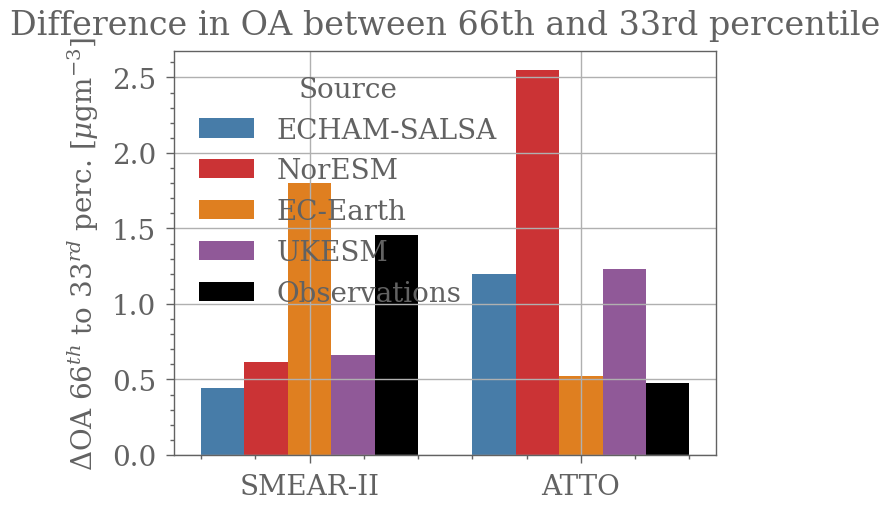

In [19]:
fig, ax = plt.subplots()
sns.barplot(y='diff',data=df_tot, hue='Source',x='station', palette=cols)

ax.set_ylabel('$\Delta$OA 66$^{th}$ to 33$^{rd}$ perc. [$\mu$gm$^{-3}$]')
ax.grid()
ax.set_xlabel('')

ax.set_title('Difference in OA between 66th and 33rd percentile')

fn = make_fn('OA', season_smr,season_atto)
fig.savefig(fn.with_suffix('.pdf'))


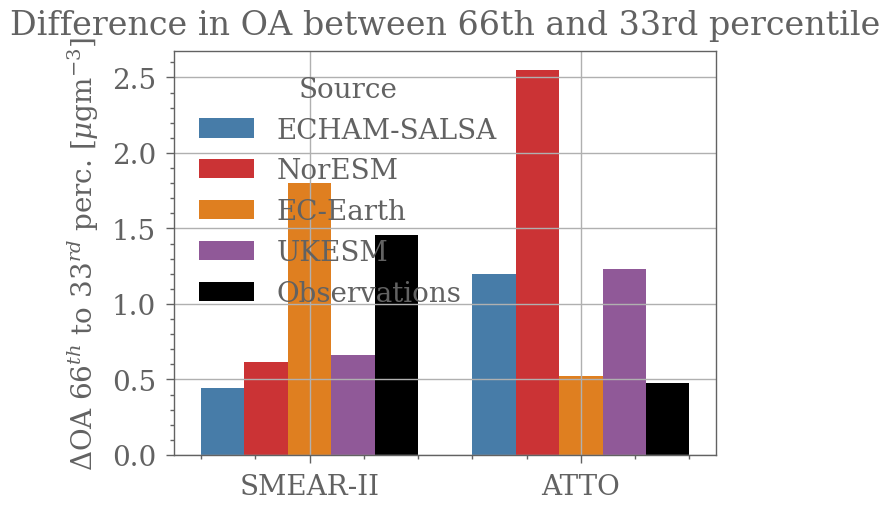

In [20]:
fig, ax = plt.subplots()
sns.barplot(y='diff',data=df_tot, hue='Source',x='station', palette=cols)

ax.set_ylabel('$\Delta$OA 66$^{th}$ to 33$^{rd}$ perc. [$\mu$gm$^{-3}$]')
ax.grid()
ax.set_xlabel('')

ax.set_title('Difference in OA between 66th and 33rd percentile')

fn = make_fn('OA', season_smr,season_atto)
fig.savefig(fn.with_suffix('.pdf'))


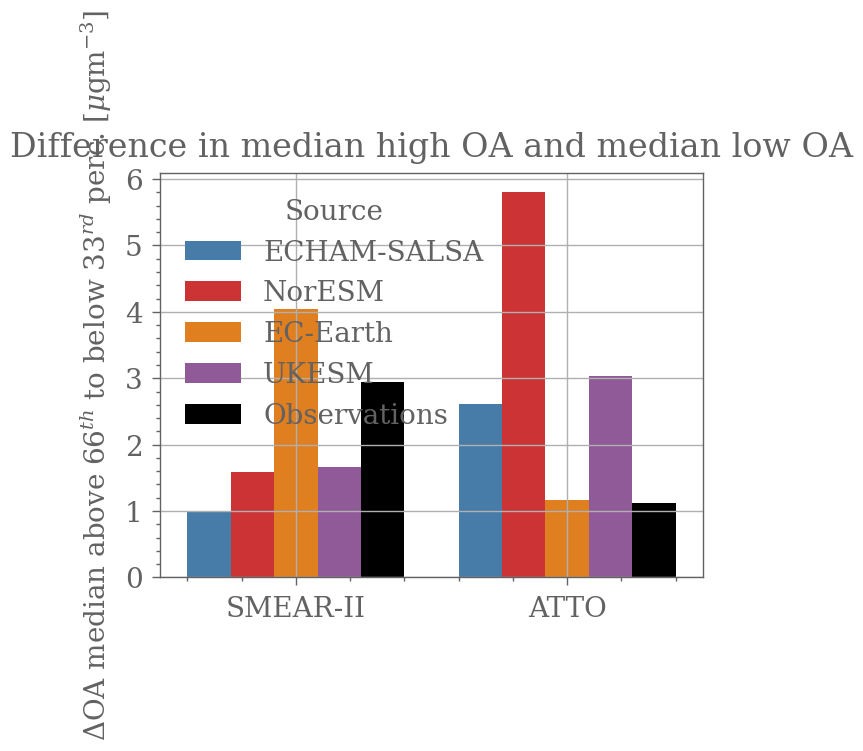

In [21]:
fig, ax = plt.subplots()
sns.barplot(y='diff_med',data=df_tot, hue='Source',x='station', palette=cols)

ax.set_ylabel('$\Delta$OA median above 66$^{th}$ to below 33$^{rd}$ perc. [$\mu$gm$^{-3}$]')
ax.grid()
ax.set_xlabel('')

ax.set_title('Difference in median high OA and median low OA')

fn = make_fn('OA', season_smr,season_atto)
fig.savefig(fn.with_suffix('.pdf'))


### Do weighted average 

In [22]:
def make_fn2(case, v_x, v_y, season, station, comment='',  ):
    plot_path = Path(f'{station}/Plots/')
    print(v_x)
    print(v_y)
    
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'cloud_props_{comment}_{case}_{_x}_{_y}_{season}.png'

    return plot_path /f


In [23]:
v = 'COT'
station = 'SMR'
dic_v_st_src = dict()

for station in ['SMR','ATTO']:
    st_nicename = dic_station2nicename[station]
    dic_v_med = dict()

    for s in ['Observations', 'NorESM','ECHAM-SALSA']:
        fn = make_fn2('sample_stats', 'OA', v, dic_station2season[station],station,comment=s).with_suffix('.csv')
        #print(fn.exists())
        print(fn)
        dic_v_med[s] = pd.read_csv(fn, index_col=0)

    #_dic_smr = dict()
    print(station)
    dic_v_st_src[st_nicename] = dict()
    for source in dic_v_med.keys():
        #print(source)
        _df = dic_v_med[source]
        delta_v_weigthed = (_df[v]*_df['n_tot']).sum()/ _df['n_tot'].sum()

        dic_v_st_src[st_nicename][source] = delta_v_weigthed
        print(delta_v_weigthed)
    print(dic_v_st_src)
    

for source in ['UKESM','EC-Earth']:
    for st in ['SMR','ATTO']:
        st_nn = dic_station2nicename[st]
        dic_v_st_src[st_nn][source] =0

_dic_delta_v_weigthed =dic_v_st_src

_dic_delta_v_weigthed

df_integrated_COT = (pd.DataFrame(_dic_delta_v_weigthed)
                     .stack()
                     .reset_index()
                     .rename({'level_1':'station','level_0':'Source',0:f'd{v}'},axis=1)
                    )



OA
COT
SMR/Plots/cloud_props_Observations_sample_stats_OA_COT_JA.csv
OA
COT
SMR/Plots/cloud_props_NorESM_sample_stats_OA_COT_JA.csv
OA
COT
SMR/Plots/cloud_props_ECHAM-SALSA_sample_stats_OA_COT_JA.csv
SMR
0.9525381262030287
3.0623230363265312
0.9471782093283587
{'SMEAR-II': {'Observations': 0.9525381262030287, 'NorESM': 3.0623230363265312, 'ECHAM-SALSA': 0.9471782093283587}}
OA
COT
ATTO/Plots/cloud_props_Observations_sample_stats_OA_COT_FMA.csv
OA
COT
ATTO/Plots/cloud_props_NorESM_sample_stats_OA_COT_FMA.csv
OA
COT
ATTO/Plots/cloud_props_ECHAM-SALSA_sample_stats_OA_COT_FMA.csv
ATTO
0.6203654855314439
0.8337868666342417
1.5285709368700267
{'SMEAR-II': {'Observations': 0.9525381262030287, 'NorESM': 3.0623230363265312, 'ECHAM-SALSA': 0.9471782093283587}, 'ATTO': {'Observations': 0.6203654855314439, 'NorESM': 0.8337868666342417, 'ECHAM-SALSA': 1.5285709368700267}}


In [24]:
v = 'r_eff'
station = 'SMR'
dic_v_st_src = dict()

for station in ['SMR','ATTO']:
    st_nicename = dic_station2nicename[station]
    dic_v_med = dict()

    for s in models_and_obs:
        fn = make_fn2('sample_stats', 'OA', v, dic_station2season[station],station,comment=s).with_suffix('.csv')
        #print(fn.exists())
        print(fn)
        dic_v_med[s] = pd.read_csv(fn, index_col=0)

    #_dic_smr = dict()
    print(station)
    dic_v_st_src[st_nicename] = dict()
    for source in dic_v_med.keys():
        #print(source)
        _df = dic_v_med[source]
        delta_v_weigthed = (_df[v]*_df['n_tot']).sum()/ _df['n_tot'].sum()

        dic_v_st_src[st_nicename][source] = delta_v_weigthed
        print(delta_v_weigthed)
    print(dic_v_st_src)


_dic_delta_v_weigthed =dic_v_st_src

_dic_delta_v_weigthed

df_integrated_r_eff = (pd.DataFrame(_dic_delta_v_weigthed)
                     .stack()
                     .reset_index()
                     .rename({'level_1':'station','level_0':'Source',0:f'd{v}'},axis=1)
                    )



OA
r_eff
SMR/Plots/cloud_props_ECHAM-SALSA_sample_stats_OA_r_eff_JA.csv
OA
r_eff
SMR/Plots/cloud_props_NorESM_sample_stats_OA_r_eff_JA.csv
OA
r_eff
SMR/Plots/cloud_props_EC-Earth_sample_stats_OA_r_eff_JA.csv
OA
r_eff
SMR/Plots/cloud_props_UKESM_sample_stats_OA_r_eff_JA.csv
OA
r_eff
SMR/Plots/cloud_props_Observations_sample_stats_OA_r_eff_JA.csv
SMR
0.0760493104477612
-1.4943210193877552
-0.5780176022727276
-0.44388176704458365
-0.37098591250308466
{'SMEAR-II': {'ECHAM-SALSA': 0.0760493104477612, 'NorESM': -1.4943210193877552, 'EC-Earth': -0.5780176022727276, 'UKESM': -0.44388176704458365, 'Observations': -0.37098591250308466}}
OA
r_eff
ATTO/Plots/cloud_props_ECHAM-SALSA_sample_stats_OA_r_eff_FMA.csv
OA
r_eff
ATTO/Plots/cloud_props_NorESM_sample_stats_OA_r_eff_FMA.csv
OA
r_eff
ATTO/Plots/cloud_props_EC-Earth_sample_stats_OA_r_eff_FMA.csv
OA
r_eff
ATTO/Plots/cloud_props_UKESM_sample_stats_OA_r_eff_FMA.csv
OA
r_eff
ATTO/Plots/cloud_props_Observations_sample_stats_OA_r_eff_FMA.csv
ATTO
-1.

In [25]:
df_integrated_cloud_prop = pd.merge(df_integrated_COT, df_integrated_r_eff, on=['Source','station'])

In [26]:
df_together = pd.merge(df_tot.rename({'diff_med':'dOA'},axis=1), df_integrated_cloud_prop, on = ['station', 'Source'],)

df_together['dCOT/dOA'] = df_together['dCOT']/df_together['dOA']
df_together['dr_eff/dOA'] = df_together['dr_eff']/df_together['dOA']

In [27]:
df_together

,Source,33rd,66th,med_high,med_low,diff,station,dOA,dCOT,dr_eff,dCOT/dOA,dr_eff/dOA
0,ECHAM-SALSA,0.527089,0.969289,1.362045,0.370045,0.442199,SMEAR-II,0.992001,0.947178,0.076049,0.954816,0.076663
1,NorESM,0.811062,1.428474,2.182364,0.596850,0.617412,SMEAR-II,1.585515,3.062323,-1.494321,1.931438,-0.942483
2,EC-Earth,2.228140,4.031360,5.576182,1.534846,1.803220,SMEAR-II,4.041336,0.000000,-0.578018,0.000000,-0.143026
3,UKESM,0.626863,1.290462,2.089116,0.420373,0.663599,SMEAR-II,1.668744,0.000000,-0.443882,0.000000,-0.265998
4,Observations,1.684095,3.137671,4.055875,1.110500,1.453576,SMEAR-II,2.945376,0.952538,-0.370986,0.323401,-0.125955
5,ECHAM-SALSA,0.900944,2.098790,3.133825,0.520110,1.197846,ATTO,2.613715,1.528571,-1.463974,0.584827,-0.560112
6,NorESM,4.372574,6.922242,9.019197,3.219887,2.549668,ATTO,5.799310,0.833787,-0.414383,0.143773,-0.071454
7,EC-Earth,2.686853,3.210406,3.559854,2.393100,0.523553,ATTO,1.166754,0.000000,-0.629884,0.000000,-0.539860
8,UKESM,3.957468,5.191280,6.107801,3.074953,1.233812,ATTO,3.032848,0.000000,-0.580929,0.000000,-0.191546
9,Observations,0.692563,1.168000,1.584301,0.467500,0.475437,ATTO,1.116801,0.620365,-1.280137,0.555484,-1.146253


<AxesSubplot:>

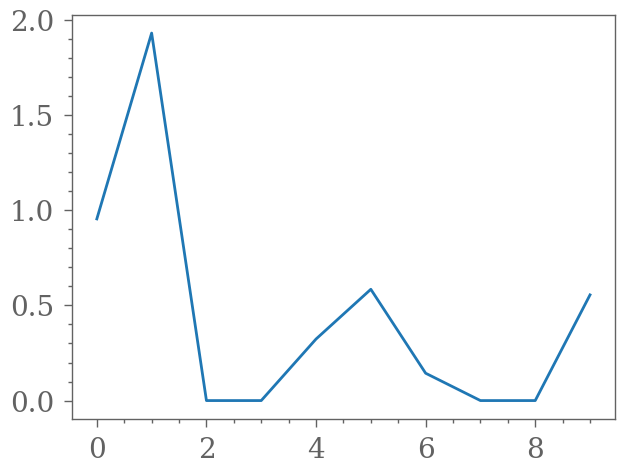

In [28]:
df_together['dCOT/dOA'].plot()

<AxesSubplot:>

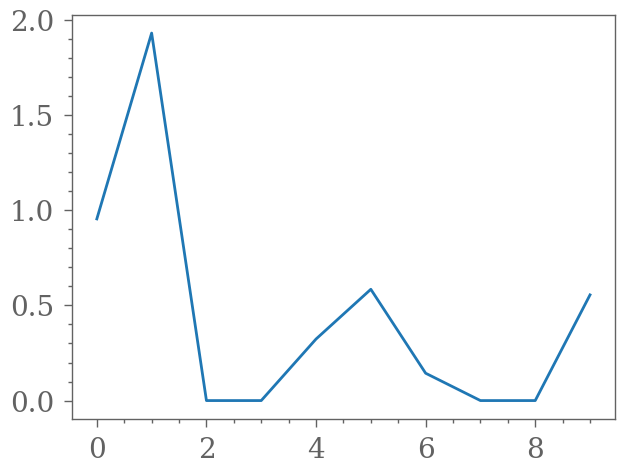

In [29]:
df_together['dCOT/dOA'].plot()

## Lets assume $\Delta T$ around 3 degrees

### Read in data

In [30]:
dic_df_med_station=dict()


In [31]:
from bs_fdbck.constants import path_measurement_data

select_station = 'SMR'
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

fn_obs_comb_data_full_time =postproc_data_obs /'SMEAR_data_comb_hourly.csv'

dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        
        # dic_df_mod_case[mod][ca].to_csv(fn_out)

df_obs = pd.read_csv(fn_obs_comb_data_full_time,index_col=0)

df_obs_rename = df_obs.rename({'Org_STP':'OA', 'HYY_META.T168':'T_C'}, axis=1)
vars_obs = ['OA', 'N100','N50','N200','T_C']

df_obs_rename = df_obs_rename[vars_obs]

df_obs_rename['some_obs_missing'] = df_obs_rename[vars_obs].isnull().any(axis=1)
df_obs_rename.index = pd.to_datetime(df_obs_rename.index)

dic_df_pre['Observations']=dict()
dic_df_pre['Observations']['Observations'] = df_obs_rename#_rename


### Save result in dictionary

dic_df_mod_case = dic_df_pre.copy()

#### Merge with observations:


df_for_merge = df_obs_rename[['OA','N100', 'some_obs_missing']].rename({'OA':'obs_OA','N100':'obs_N100',},axis=1)

for mod in dic_df_mod_case.keys():
    if mod=='Observations':
        dic_df_mod_case[mod][mod] = dic_df_mod_case[mod][mod].rename({'some_obs_missing':'some_obs_missing_x'}, axis=1)
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

dic_mod2case = mod2cases

## Compute daily medians:

dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    for ca in dic_df_mod_case[mo].keys():
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        
        _df = _df[_df['some_obs_missing']==False]
        dic_df_med[use_name] = _df.resample('D').median()
        
        
dic_df_med_station[select_station] = dic_df_med.copy()


ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_UKESM_AEROCOMTRAJ.csv
ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [32]:
from bs_fdbck.constants import path_measurement_data


In [33]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

In [34]:
import xarray as xr

In [35]:
!ls /proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/

ATTO_station_EC-Earth_ECE3_output_Sara_ilev-1.csv
ATTO_station_EC-Earth_ECE3_output_Sara_ilev-3.csv
ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-1.csv
ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-3.csv
ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv
ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-3.csv
ATTO_station_UKESM_AEROCOMTRAJ_ilev-1.csv
ATTO_station_UKESM_AEROCOMTRAJ_ilev-3.csv


### Set level to read

In [36]:
dic_model_level = dict(
    SMR= -1,
    ATTO=-1,
)

In [37]:
from bs_fdbck.constants import path_measurement_data

select_station = 'ATTO'
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{dic_model_level[select_station]}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)


        
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

ds_ATTO = ds_ATTO.sel(time_traj=0)
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity',#'wind_dir',
        'precip',#'Solar_inc_Wm2',
        #'Solar_out_Wm2',
        #'wind_speed','wind_speed_v',
        'OA'
]

df_ATTO = ds_ATTO[varl].drop('time_traj').to_dataframe()
df_ATTO['some_obs_missing'] = df_ATTO[vars_obs].isnull().any(axis=1)
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = df_ATTO_obs_rename
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)


dic_df_ATTO = dic_df_pre.copy()

dic_df_mod_case = dic_df_pre.copy()

df_for_merge = df_ATTO[['OA','N100-500', 'some_obs_missing']].rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)

for mod in dic_df_mod_case.keys():
    if mod=='Observations':
        dic_df_mod_case[mod][mod] = dic_df_mod_case[mod][mod].rename({'some_obs_missing':'some_obs_missing_x'}, axis=1)
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    print(mo) 
    for ca in dic_df_mod_case[mo].keys():
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        
        _df = _df[_df['some_obs_missing']==False]
        dic_df_med[use_name] = _df.resample('D').median()
        


dic_df_med_station[select_station] = dic_df_med.copy()

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-1.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-1.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-1.csv


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations
ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


## Rename STP 

In [38]:
for st in dic_df_med_station.keys():
    for mod in dic_df_med_station[st].keys():
        print(mod)
        for v in ['OA','N100','N50','N200','N500','N100-500','N50-500','N200-500']:
            if (f'{v}_STP' in dic_df_med_station[st][mod].columns):
                if v in dic_df_med_station[st][mod].columns:
                    dic_df_med_station[st][mod] = dic_df_med_station[st][mod].drop([v], axis=1)
                    print('dropping OA in favor of OA_STP')
                dic_df_med_station[st][mod] = dic_df_med_station[st][mod].rename({f'{v}_STP':v}, axis=1)
                print(f'remaning {v}_STP to {v}')
                

ECHAM-SALSA
NorESM
remaning OA_STP to OA
remaning N100_STP to N100
remaning N50_STP to N50
remaning N200_STP to N200
EC-Earth
remaning OA_STP to OA
remaning N100_STP to N100
remaning N50_STP to N50
remaning N200_STP to N200
UKESM
remaning OA_STP to OA
remaning N100_STP to N100
remaning N50_STP to N50
remaning N200_STP to N200
Observations
ECHAM-SALSA
NorESM
remaning OA_STP to OA
remaning N100_STP to N100
remaning N50_STP to N50
remaning N200_STP to N200
remaning N500_STP to N500
remaning N100-500_STP to N100-500
remaning N50-500_STP to N50-500
remaning N200-500_STP to N200-500
EC-Earth
remaning OA_STP to OA
remaning N100_STP to N100
remaning N50_STP to N50
remaning N200_STP to N200
remaning N500_STP to N500
dropping OA in favor of OA_STP
remaning N100-500_STP to N100-500
dropping OA in favor of OA_STP
remaning N50-500_STP to N50-500
dropping OA in favor of OA_STP
remaning N200-500_STP to N200-500
UKESM
remaning OA_STP to OA
remaning N100_STP to N100
remaning N50_STP to N50
remaning N20

In [39]:
from bs_fdbck.util.BSOA_datamanip.fits import *
from bs_fdbck.util.BSOA_datamanip.atto import season2month

### season to monthseason2month

In [40]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [41]:
mod2cases['Observations']= ['Observations']

In [42]:
dic_med_temperature = dict()

In [43]:
station = 'SMR'
season=season_smr
dic_med_temperature[station] = dict()
dic_df_med = dic_df_med_station[station]
for mo in models_and_obs:
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(df_s['T_C'].median())
    dic_med_temperature[station][mo] = df_s['T_C'].median()

ECHAM-SALSA
16.9028395
NorESM
15.71039575
EC-Earth
15.708069
UKESM
16.919036499999997
Observations
15.279010791666668


In [44]:
station = 'ATTO'
season=dic_station2season[station]
dic_med_temperature[station] = dict()
dic_df_med = dic_df_med_station[station]
for mo in models_and_obs:
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(df_s['T_C'].median())
    dic_med_temperature[station][mo] = df_s['T_C'].median()

ECHAM-SALSA
27.170105
NorESM
24.0382155
EC-Earth
24.5596465
UKESM
30.269623
Observations
25.505


## Median OA: 

In [45]:
station = 'SMR'
season=dic_station2season[station]

dic_med_temperature[station] = dict()
dic_df_med = dic_df_med_station[station]
for mo in models_and_obs:
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(df_s['OA'].median())
    dic_med_temperature[station][mo] = df_s['T_C'].median()

ECHAM-SALSA
0.9313055625
NorESM
1.4796122165320356
EC-Earth
1.7149415283921519
UKESM
2.001357619874152
Observations
2.458951857754413


In [46]:
station = 'ATTO'
season=dic_station2season[station]

dic_med_temperature[station] = dict()
dic_df_med = dic_df_med_station[station]
for mo in models_and_obs:
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(df_s['OA'].median())
    dic_med_temperature[station][mo] = df_s['T_C'].median()

ECHAM-SALSA
2.018588375
NorESM
6.444050894638025
EC-Earth
1.887898793614175
UKESM
3.105919597278577
Observations
0.7466888372210787


In [47]:
station = 'ATTO'
season=dic_station2season[station]

dic_med_temperature[station] = dict()
dic_df_med = dic_df_med_station[station]
for mo in models_and_obs:
    df_s =  dic_df_med[mo]
    print(mo)
    if mo!='Observations':
        df_s['N100-500'] = df_s['N100']- df_s['N500']
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(df_s['N100-500'].median())
    dic_med_temperature[station][mo] = df_s['T_C'].median()

ECHAM-SALSA
240.99918237499998
NorESM
2412.2385305739645
EC-Earth
184.35958200753078
UKESM
1085.4651070265863
Observations
163.83025851244292


In [48]:
station = 'SMR'
season=dic_station2season[station]

dic_med_temperature[station] = dict()
dic_df_med = dic_df_med_station[station]
for mo in models_and_obs:
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(df_s['N100'].median())
    dic_med_temperature[station][mo] = df_s['T_C'].median()

ECHAM-SALSA
174.5434775
NorESM
398.6068157803266
EC-Earth
228.78795471117584
UKESM
780.9438235587425
Observations
550.6500588731074


In [49]:
176.24964/560.5083086698271

0.3144460791638712

In [50]:
151.0/177.8

0.8492688413948256

In [51]:
smr_start = 15 
atto_start = 25 

In [52]:
fit_overview = '../02-sizedist_plots_N/Plots/Both_stations/all_fits.csv'

In [53]:
df_fits = pd.read_csv(fit_overview, index_col=[0,1,2,3])

In [54]:
df_fits.head()

a  \
station variable data source  Fit                                            
SMR     OA       UKESM        $a\cdot \exp{(bx)}$  5.63E-02 $\pm$ 2.02E-02   
                 Observations $a\cdot \exp{(bx)}$          0.12 $\pm$ 0.02   
                 NorESM       $a\cdot \exp{(bx)}$  8.97E-02 $\pm$ 1.69E-02   
                 ECHAM-SALSA  $a\cdot \exp{(bx)}$  1.71E-02 $\pm$ 2.22E-02   
                 EC-Earth     $a\cdot \exp{(bx)}$  7.41E-02 $\pm$ 2.05E-02   

                                                                 b    c  \
station variable data source  Fit                                         
SMR     OA       UKESM        $a\cdot \exp{(bx)}$  0.21 $\pm$ 0.35  NaN   
                 Observations $a\cdot \exp{(bx)}$  0.19 $\pm$ 0.30  NaN   
                 NorESM       $a\cdot \exp{(bx)}$  0.18 $\pm$ 0.28  NaN   
                 ECHAM-SALSA  $a\cdot \exp{(bx)}$  0.23 $\pm$ 0.39  NaN   
                 EC-Earth     $a\cdot \exp{(bx)}$  0.20 $\pm$ 0.33  NaN   

                                                   r$^2$            full_fit  
station variable data source  Fit                                             
SMR     OA       UKESM        $a\cdot \exp{(bx)}$   0.56  $ 0.06 e^{ 0.21x}$  
                 Observations $a\cdot \exp{(bx)}$   0.45  $ 0.12 e^{ 0.19x}$  
                 NorESM       $a\cdot \exp{(bx)}$   0.58  $ 0.09 e^{ 0.18x}$  
                 ECHAM-SALSA  $a\cdot \exp{(bx)}$   0.53  $ 0.02 e^{ 0.23x}$  
                 EC-Earth     $a\cdot \exp{(bx)}$   0.41  $ 0.07 e^{ 0.20x}$

In [55]:
df_fits.loc[('SMR', 'OA','NorESM',)].index

/tmp/ipykernel_103157/4255004586.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_fits.loc[('SMR', 'OA','NorESM',)].index


Index(['$a\cdot \exp{(bx)}$'], dtype='object', name='Fit')

In [56]:
def exp_mod(T, mod, station):
    a = float(df_fits.loc[(station, 'OA',mod,'$a\cdot \exp{(bx)}$'),'a'][0].split('$\pm$')[0])
    b = float(df_fits.loc[(station, 'OA',mod,'$a\cdot \exp{(bx)}$'),'b'][0].split('$\pm$')[0])
    print(f'${a}exp({b}T)$')
    return a*np.exp(b*T)
exp_mod(15,'Observations','ATTO')

$9.52e-07exp(0.53T)$


/tmp/ipykernel_103157/4167302134.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  a = float(df_fits.loc[(station, 'OA',mod,'$a\cdot \exp{(bx)}$'),'a'][0].split('$\pm$')[0])
/tmp/ipykernel_103157/4167302134.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  b = float(df_fits.loc[(station, 'OA',mod,'$a\cdot \exp{(bx)}$'),'b'][0].split('$\pm$')[0])


0.0026994673528517336

In [57]:
def exp_noresm_smr(T):
    return exp_mod(T, 'NorESM', 'SMR')
def exp_echam_salsa_smr(T):
    return exp_mod(T, 'ECHAM-SALSA', 'SMR')
def exp_ec_earth_smr(T):
    return 0.19*np.exp(0.14*T)
def exp_obs_smr(T):
    return 0.35*np.exp(0.13*T)

In [58]:
def exp_noresm_atto(T):
    return 2.3e-4*np.exp(0.4*T)
def exp_echam_salsa_atto(T):
    return 0.46*np.exp(0.05*T)
def exp_ec_earth_atto(T):
    return 0.52*np.exp(0.05*T)
def exp_obs_atto(T):
    return 8.5e-6*np.exp(0.45*T)

In [59]:
dic_exp_funcs={
    'SMEAR-II': {'Observations':exp_obs_smr,
              'NorESM':exp_noresm_smr,
              'ECHAM-SALSA':exp_echam_salsa_smr,
              'EC-Earth':exp_ec_earth_smr,
             },
    'ATTO':{'Observations':exp_obs_atto,
              'NorESM':exp_noresm_atto,
              'ECHAM-SALSA':exp_echam_salsa_atto,
              'EC-Earth':exp_ec_earth_atto,
             },   
}

In [60]:
def exp_station_source(station, source, T=None ):
    #func = dic_exp_funcs[station][source]
    if T is None:
        T = dic_med_temperature[station][source]
    print(f'Temperature:{T}')
    
    
    return exp_mod(T, source,station)
    

In [61]:
dic_dOA_dT =dict()
for st in ['SMR','ATTO']:

        
    dic_dOA_dT[st] = dict()
    for so in order_sources:
        T = dic_med_temperature[st]['Observations']        
        dic_dOA_dT[st][so] = (exp_station_source(st, so, T+3)- exp_station_source(st, so, T))/3


/tmp/ipykernel_103157/4167302134.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  a = float(df_fits.loc[(station, 'OA',mod,'$a\cdot \exp{(bx)}$'),'a'][0].split('$\pm$')[0])
/tmp/ipykernel_103157/4167302134.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  b = float(df_fits.loc[(station, 'OA',mod,'$a\cdot \exp{(bx)}$'),'b'][0].split('$\pm$')[0])


Temperature:18.279010791666668
$0.0171exp(0.23T)$
Temperature:15.279010791666668
$0.0171exp(0.23T)$
Temperature:18.279010791666668
$0.0897exp(0.18T)$
Temperature:15.279010791666668
$0.0897exp(0.18T)$
Temperature:18.279010791666668
$0.0741exp(0.2T)$
Temperature:15.279010791666668
$0.0741exp(0.2T)$
Temperature:18.279010791666668
$0.0563exp(0.21T)$
Temperature:15.279010791666668
$0.0563exp(0.21T)$
Temperature:18.279010791666668
$0.12exp(0.19T)$
Temperature:15.279010791666668
$0.12exp(0.19T)$
Temperature:28.505
$0.0512exp(0.13T)$
Temperature:25.505
$0.0512exp(0.13T)$
Temperature:28.505
$0.00112exp(0.35T)$
Temperature:25.505
$0.00112exp(0.35T)$
Temperature:28.505
$0.00111exp(0.3T)$
Temperature:25.505
$0.00111exp(0.3T)$
Temperature:28.505
$2.99exp(0.00125T)$
Temperature:25.505
$2.99exp(0.00125T)$
Temperature:28.505
$9.52e-07exp(0.53T)$
Temperature:25.505
$9.52e-07exp(0.53T)$


In [62]:
dic_med_temperature

{'SMR': {'ECHAM-SALSA': 16.9028395,
  'NorESM': 15.71039575,
  'EC-Earth': 15.708069,
  'UKESM': 16.919036499999997,
  'Observations': 15.279010791666668},
 'ATTO': {'ECHAM-SALSA': 27.170105,
  'NorESM': 24.0382155,
  'EC-Earth': 24.5596465,
  'UKESM': 30.269623,
  'Observations': 25.505}}

In [63]:
df_dOA_dT = pd.DataFrame(dic_dOA_dT).stack().reset_index().rename({'level_0':'Source','level_1':'station',0:'dOA/dT'},axis=1)

In [64]:
df_dOA_dT = df_dOA_dT.replace('SMR','SMEAR-II')

In [65]:
df_dOA_dT

,Source,station,dOA/dT
0,ECHAM-SALSA,SMEAR-II,0.190249
1,ECHAM-SALSA,ATTO,0.224191
2,NorESM,SMEAR-II,0.334961
3,NorESM,ATTO,5.222749
4,EC-Earth,SMEAR-II,0.431270
5,EC-Earth,ATTO,1.136163
6,UKESM,SMEAR-II,0.407533
7,UKESM,ATTO,0.003866
8,Observations,SMEAR-II,0.560189
9,Observations,ATTO,0.919683


In [66]:
cols

['#377eb8', '#e41a1c', '#ff7f00', '#984ea3', 'k']

<AxesSubplot:xlabel='station', ylabel='dOA/dT'>

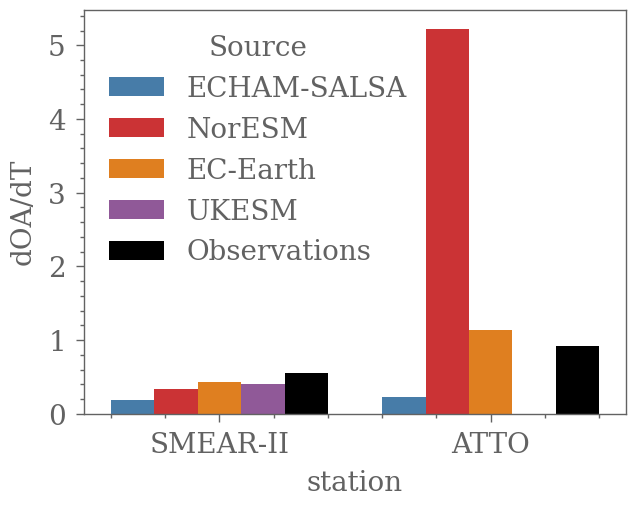

In [67]:

sns.barplot(y='dOA/dT', x='station', hue='Source', data= df_dOA_dT, palette=cols)

In [68]:
df_together

,Source,33rd,66th,med_high,med_low,diff,station,dOA,dCOT,dr_eff,dCOT/dOA,dr_eff/dOA
0,ECHAM-SALSA,0.527089,0.969289,1.362045,0.370045,0.442199,SMEAR-II,0.992001,0.947178,0.076049,0.954816,0.076663
1,NorESM,0.811062,1.428474,2.182364,0.596850,0.617412,SMEAR-II,1.585515,3.062323,-1.494321,1.931438,-0.942483
2,EC-Earth,2.228140,4.031360,5.576182,1.534846,1.803220,SMEAR-II,4.041336,0.000000,-0.578018,0.000000,-0.143026
3,UKESM,0.626863,1.290462,2.089116,0.420373,0.663599,SMEAR-II,1.668744,0.000000,-0.443882,0.000000,-0.265998
4,Observations,1.684095,3.137671,4.055875,1.110500,1.453576,SMEAR-II,2.945376,0.952538,-0.370986,0.323401,-0.125955
5,ECHAM-SALSA,0.900944,2.098790,3.133825,0.520110,1.197846,ATTO,2.613715,1.528571,-1.463974,0.584827,-0.560112
6,NorESM,4.372574,6.922242,9.019197,3.219887,2.549668,ATTO,5.799310,0.833787,-0.414383,0.143773,-0.071454
7,EC-Earth,2.686853,3.210406,3.559854,2.393100,0.523553,ATTO,1.166754,0.000000,-0.629884,0.000000,-0.539860
8,UKESM,3.957468,5.191280,6.107801,3.074953,1.233812,ATTO,3.032848,0.000000,-0.580929,0.000000,-0.191546
9,Observations,0.692563,1.168000,1.584301,0.467500,0.475437,ATTO,1.116801,0.620365,-1.280137,0.555484,-1.146253


<AxesSubplot:xlabel='station', ylabel='dCOT/dOA'>

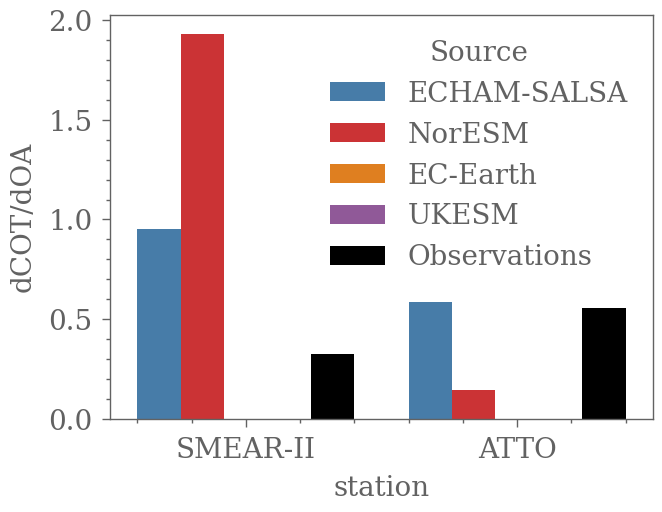

In [69]:

sns.barplot(y='dCOT/dOA', x='station', hue='Source', data= df_together, palette=cols)

In [70]:
df_together = pd.merge(df_together, df_dOA_dT, on = ['station', 'Source'],)

In [71]:
df_together

,Source,33rd,66th,med_high,med_low,diff,station,dOA,dCOT,dr_eff,dCOT/dOA,dr_eff/dOA,dOA/dT
0,ECHAM-SALSA,0.527089,0.969289,1.362045,0.370045,0.442199,SMEAR-II,0.992001,0.947178,0.076049,0.954816,0.076663,0.190249
1,NorESM,0.811062,1.428474,2.182364,0.596850,0.617412,SMEAR-II,1.585515,3.062323,-1.494321,1.931438,-0.942483,0.334961
2,EC-Earth,2.228140,4.031360,5.576182,1.534846,1.803220,SMEAR-II,4.041336,0.000000,-0.578018,0.000000,-0.143026,0.431270
3,UKESM,0.626863,1.290462,2.089116,0.420373,0.663599,SMEAR-II,1.668744,0.000000,-0.443882,0.000000,-0.265998,0.407533
4,Observations,1.684095,3.137671,4.055875,1.110500,1.453576,SMEAR-II,2.945376,0.952538,-0.370986,0.323401,-0.125955,0.560189
5,ECHAM-SALSA,0.900944,2.098790,3.133825,0.520110,1.197846,ATTO,2.613715,1.528571,-1.463974,0.584827,-0.560112,0.224191
6,NorESM,4.372574,6.922242,9.019197,3.219887,2.549668,ATTO,5.799310,0.833787,-0.414383,0.143773,-0.071454,5.222749
7,EC-Earth,2.686853,3.210406,3.559854,2.393100,0.523553,ATTO,1.166754,0.000000,-0.629884,0.000000,-0.539860,1.136163
8,UKESM,3.957468,5.191280,6.107801,3.074953,1.233812,ATTO,3.032848,0.000000,-0.580929,0.000000,-0.191546,0.003866
9,Observations,0.692563,1.168000,1.584301,0.467500,0.475437,ATTO,1.116801,0.620365,-1.280137,0.555484,-1.146253,0.919683


## Calculate dCOT/dT and dr_eff/dT

In [72]:
df_together['dCOT/dT'] =df_together['dOA/dT']*df_together['dCOT/dOA'] 
df_together['dr_eff/dT'] =df_together['dOA/dT']*df_together['dr_eff/dOA'] 


<AxesSubplot:xlabel='station', ylabel='dCOT/dT'>

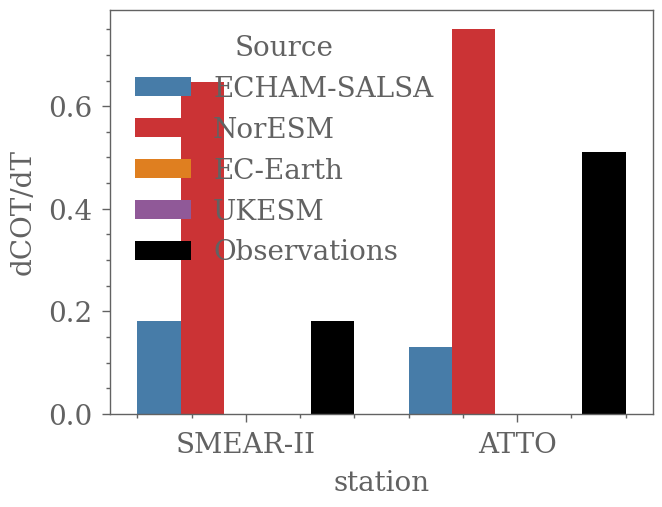

In [73]:

sns.barplot(y='dCOT/dT',x='station', hue='Source', data= df_together, palette=cols)

<AxesSubplot:xlabel='station', ylabel='dr_eff/dT'>

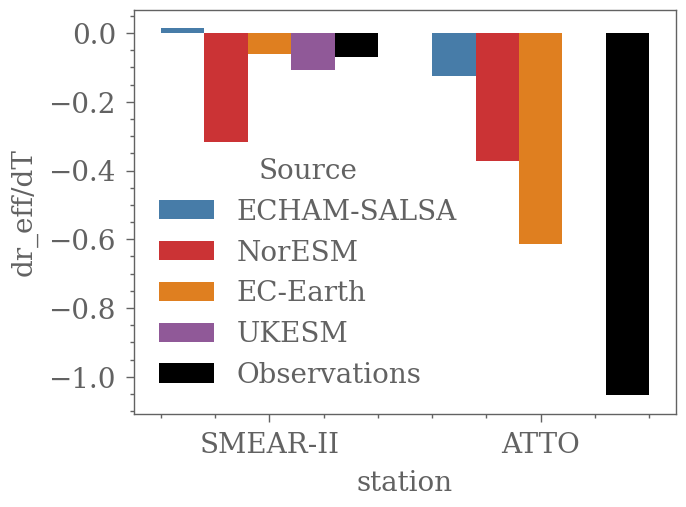

In [74]:

sns.barplot(y='dr_eff/dT',x='station', hue='Source', data= df_together, palette=cols)

In [75]:
df_together

,Source,33rd,66th,med_high,med_low,diff,station,dOA,dCOT,dr_eff,dCOT/dOA,dr_eff/dOA,dOA/dT,dCOT/dT,dr_eff/dT
0,ECHAM-SALSA,0.527089,0.969289,1.362045,0.370045,0.442199,SMEAR-II,0.992001,0.947178,0.076049,0.954816,0.076663,0.190249,0.181653,0.014585
1,NorESM,0.811062,1.428474,2.182364,0.596850,0.617412,SMEAR-II,1.585515,3.062323,-1.494321,1.931438,-0.942483,0.334961,0.646957,-0.315695
2,EC-Earth,2.228140,4.031360,5.576182,1.534846,1.803220,SMEAR-II,4.041336,0.000000,-0.578018,0.000000,-0.143026,0.431270,0.000000,-0.061683
3,UKESM,0.626863,1.290462,2.089116,0.420373,0.663599,SMEAR-II,1.668744,0.000000,-0.443882,0.000000,-0.265998,0.407533,0.000000,-0.108403
4,Observations,1.684095,3.137671,4.055875,1.110500,1.453576,SMEAR-II,2.945376,0.952538,-0.370986,0.323401,-0.125955,0.560189,0.181166,-0.070559
5,ECHAM-SALSA,0.900944,2.098790,3.133825,0.520110,1.197846,ATTO,2.613715,1.528571,-1.463974,0.584827,-0.560112,0.224191,0.131113,-0.125572
6,NorESM,4.372574,6.922242,9.019197,3.219887,2.549668,ATTO,5.799310,0.833787,-0.414383,0.143773,-0.071454,5.222749,0.750893,-0.373186
7,EC-Earth,2.686853,3.210406,3.559854,2.393100,0.523553,ATTO,1.166754,0.000000,-0.629884,0.000000,-0.539860,1.136163,0.000000,-0.613369
8,UKESM,3.957468,5.191280,6.107801,3.074953,1.233812,ATTO,3.032848,0.000000,-0.580929,0.000000,-0.191546,0.003866,0.000000,-0.000740
9,Observations,0.692563,1.168000,1.584301,0.467500,0.475437,ATTO,1.116801,0.620365,-1.280137,0.555484,-1.146253,0.919683,0.510870,-1.054190


Plots/delta_percentile_JA_FMA_COT2Twhole_feedback_comparison.png


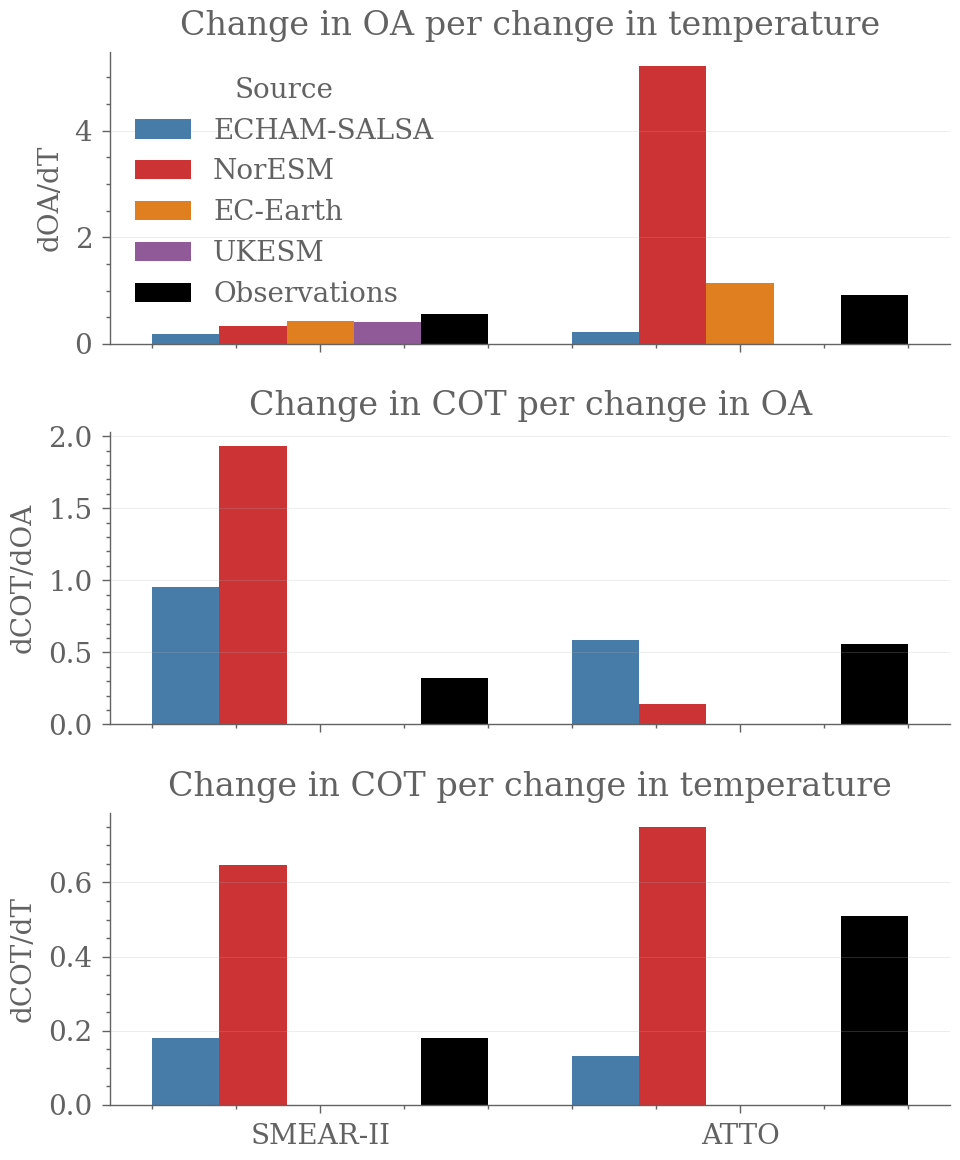

In [76]:
fig, axs = plt.subplots(3,1, figsize=[5,6], sharex=True)
sns.barplot(y='dOA/dT', x='station', hue='Source', data= df_together, palette=cols, ax = axs[0], )
sns.barplot(y='dCOT/dOA', x='station', hue='Source', data= df_together, palette=cols, ax = axs[1])
sns.barplot(y='dCOT/dT',x='station', hue='Source', data= df_together, palette=cols, ax = axs[2])

l = axs[0].get_legend().draw_frame(False)


for ax in axs[1:]:
    ax.get_legend().set_visible(False)
    
for ax in axs:
    ax.grid(axis='y', linewidth=.2, alpha=.4)
    ax.set_xlabel('')
    
axs[0].set_title('Change in OA per change in temperature')
axs[1].set_title('Change in COT per change in OA')
axs[2].set_title('Change in COT per change in temperature')



fn = make_fn('COT2T',season_smr, season_atto,comment='whole_feedback_comparison')
print(fn)
fig.tight_layout()
sns.despine(fig)
fig.savefig(fn.with_suffix('.pdf'))
#axs[0].set_title('Organic aerosol per change in temperature')

Plots/delta_percentile_JA_FMA_COT2Twhole_feedback_comparison.png


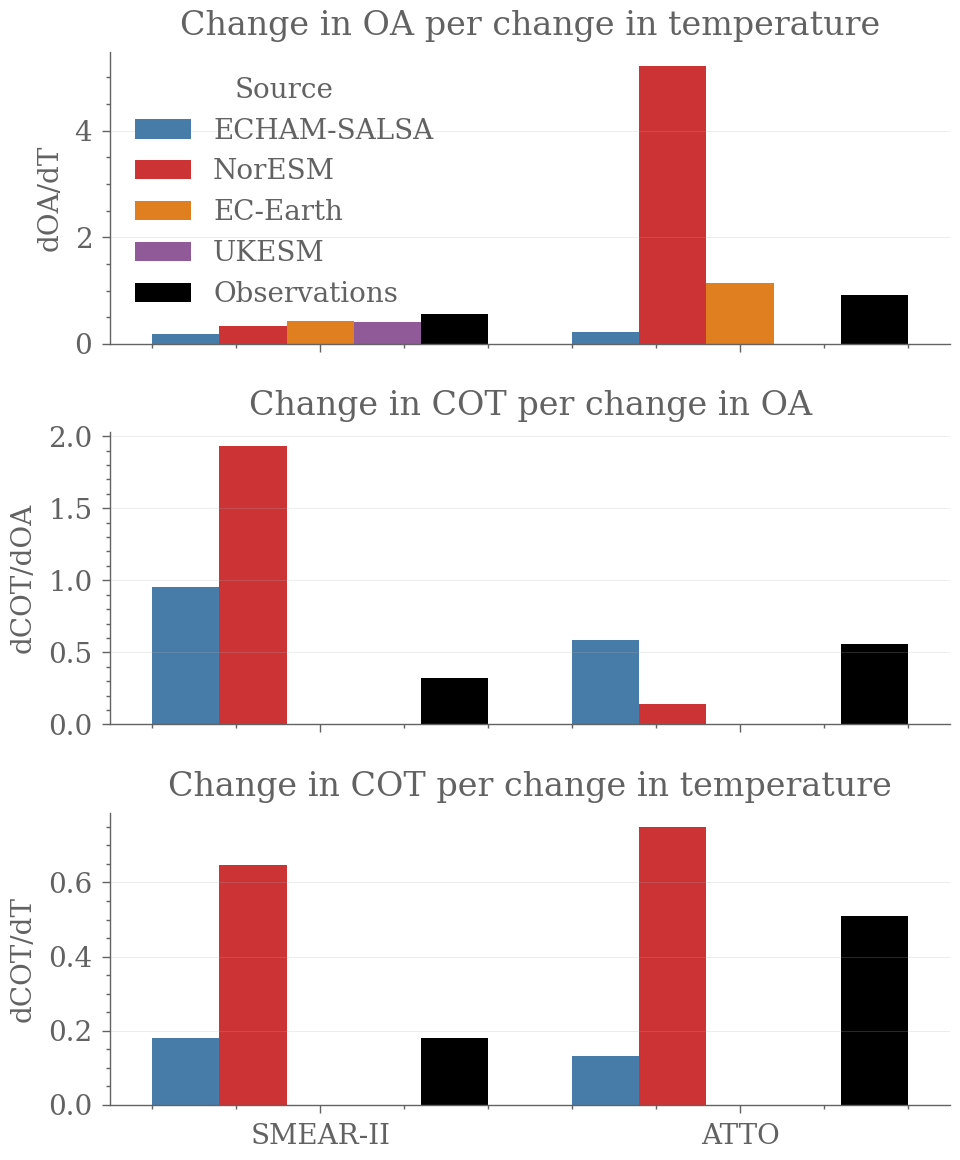

In [77]:
fig, axs = plt.subplots(3,1, figsize=[5,6], sharex=True)
sns.barplot(y='dOA/dT', x='station', hue='Source', data= df_together, palette=cols, ax = axs[0], )
sns.barplot(y='dCOT/dOA', x='station', hue='Source', data= df_together, palette=cols, ax = axs[1])
sns.barplot(y='dCOT/dT',x='station', hue='Source', data= df_together, palette=cols, ax = axs[2])

l = axs[0].get_legend().draw_frame(False)


for ax in axs[1:]:
    ax.get_legend().set_visible(False)
    
for ax in axs:
    ax.grid(axis='y', linewidth=.2, alpha=.4)
    ax.set_xlabel('')
    
axs[0].set_title('Change in OA per change in temperature')
axs[1].set_title('Change in COT per change in OA')
axs[2].set_title('Change in COT per change in temperature')



fn = make_fn('COT2T',season_smr, season_atto,comment='whole_feedback_comparison')
print(fn)
fig.tight_layout()
sns.despine(fig)
fig.savefig(fn.with_suffix('.pdf'))
#axs[0].set_title('Organic aerosol per change in temperature')

Plots/delta_percentile_JA_FMA_COT2Twhole_feedback_comparison.png


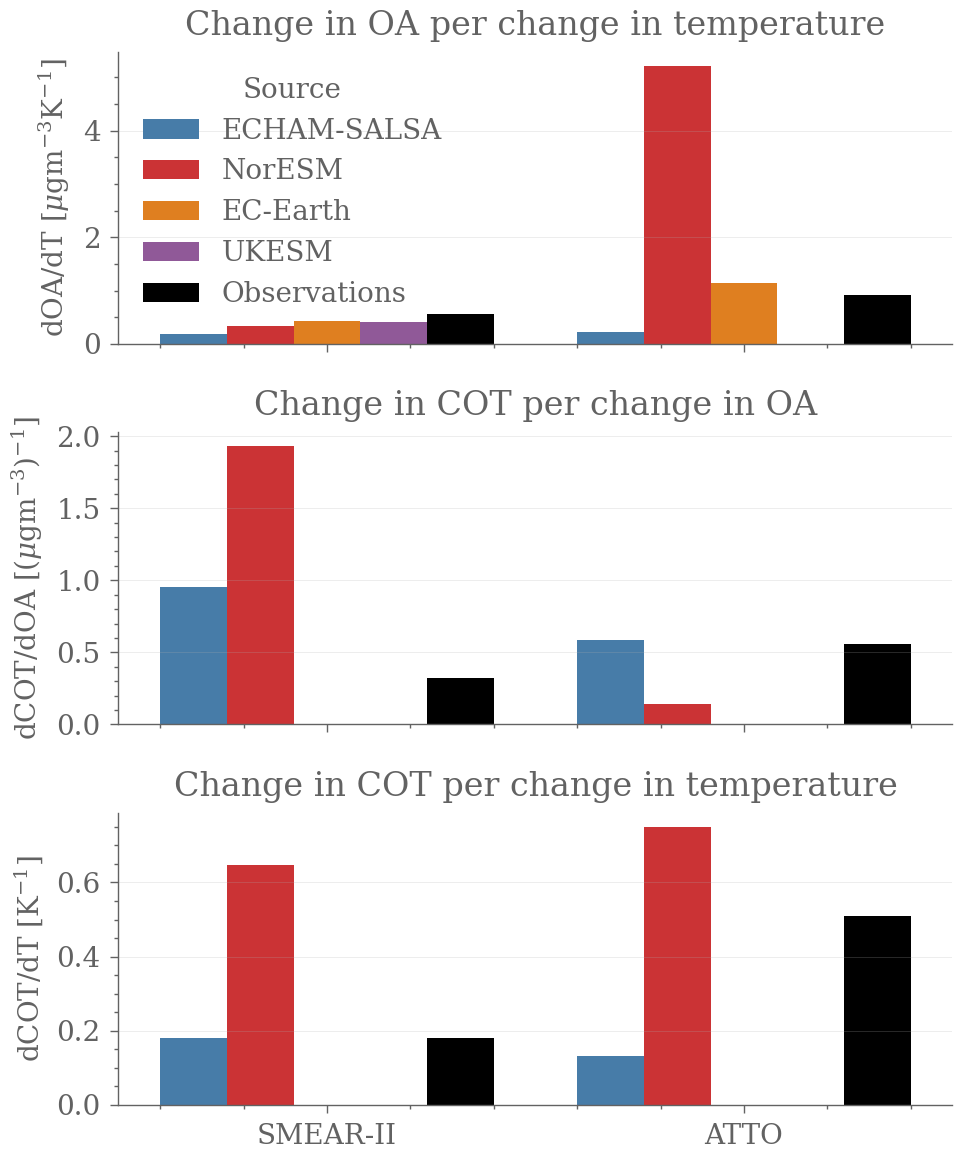

In [78]:
fig, axs = plt.subplots(3,1, figsize=[5,6], sharex=True)
sns.barplot(y='dOA/dT', x='station', hue='Source', data= df_together, palette=cols, ax = axs[0], )
sns.barplot(y='dCOT/dOA', x='station', hue='Source', data= df_together, palette=cols, ax = axs[1])
sns.barplot(y='dCOT/dT',x='station', hue='Source', data= df_together, palette=cols, ax = axs[2])

l = axs[0].get_legend().draw_frame(False)


for ax in axs[1:]:
    ax.get_legend().set_visible(False)
    
for ax in axs:
    ax.grid(axis='y', linewidth=.2, alpha=.4)
    ax.set_xlabel('')
    
axs[0].set_title('Change in OA per change in temperature')
axs[1].set_title('Change in COT per change in OA')
axs[2].set_title('Change in COT per change in temperature')

axs[0].set_ylabel('dOA/dT [$\mu$gm$^{-3}$K$^{-1}$]')
axs[1].set_ylabel('dCOT/dOA [($\mu$gm$^{-3}$)$^{-1}$]')
axs[2].set_ylabel('dCOT/dT [K$^{-1}$]')


fn = make_fn('COT2T',season_smr, season_atto,comment='whole_feedback_comparison')
print(fn)
fig.tight_layout()
sns.despine(fig)
fig.savefig(fn.with_suffix('.pdf'))
#axs[0].set_title('Organic aerosol per change in temperature')

Plots/delta_percentile_JA_FMA_r_eff2Twhole_feedback_comparison.png


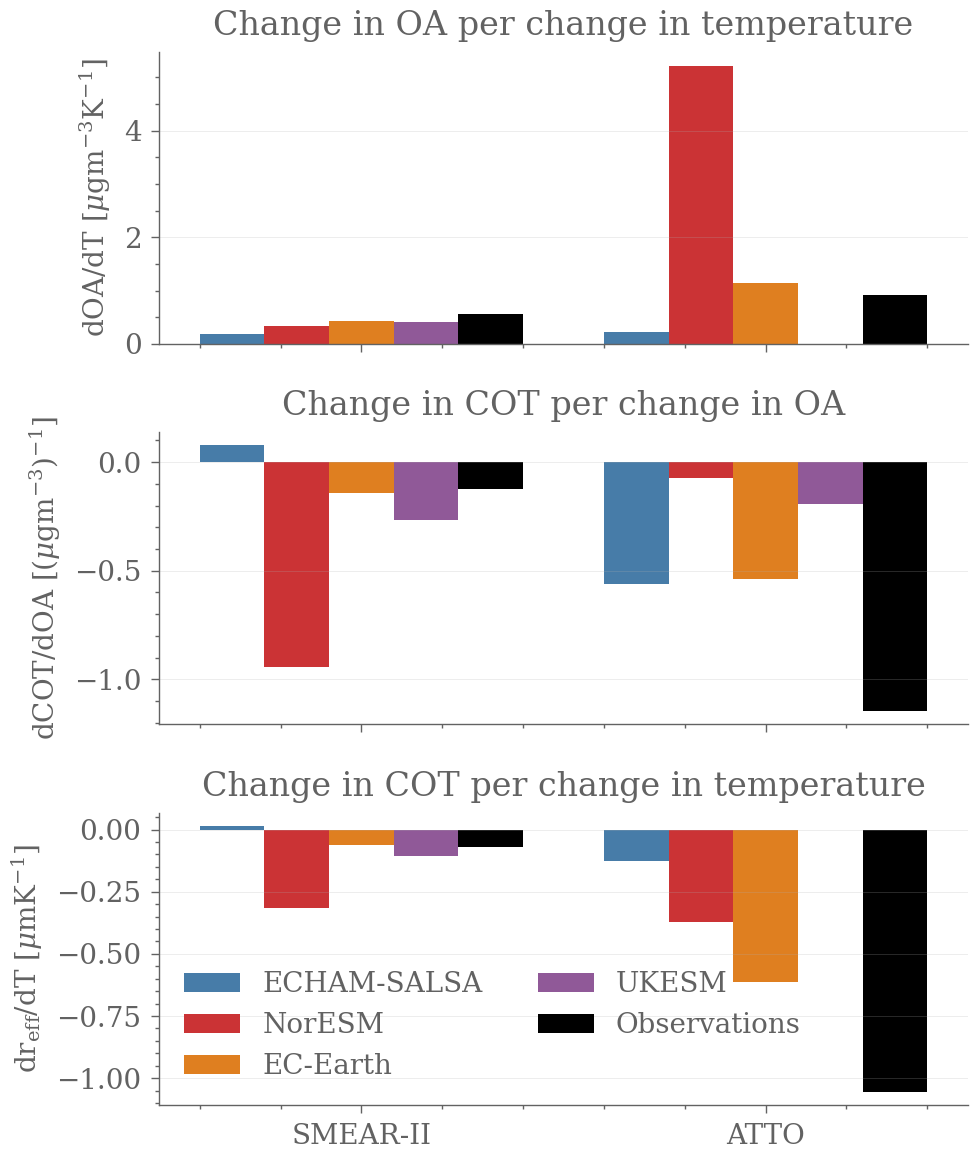

In [79]:
fig, axs = plt.subplots(3,1, figsize=[5,6], sharex=True)
g = sns.barplot(y='dOA/dT', x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[0], )
sns.barplot(y='dr_eff/dOA', x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[1])
sns.barplot(y='dr_eff/dT',x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[2])

#l = axs[0].get_legend().draw_frame(False)
axs[-1].legend( ncol = 2, frameon=False)

for ax in axs[:-1]:
    ax.get_legend().set_visible(False)

    
for ax in axs:
    ax.grid(axis='y', linewidth=.2, alpha=.4)
    ax.set_xlabel('')
    
axs[0].set_title('Change in OA per change in temperature')
axs[1].set_title('Change in COT per change in OA')
axs[2].set_title('Change in COT per change in temperature')

axs[0].set_ylabel('dOA/dT [$\mu$gm$^{-3}$K$^{-1}$]')
axs[1].set_ylabel('dCOT/dOA [($\mu$gm$^{-3}$)$^{-1}$]')
axs[2].set_ylabel('dr$_{\mathrm{eff}}$/dT [$\mu$mK$^{-1}$]')


fn = make_fn('r_eff2T',season_smr, season_atto,comment='whole_feedback_comparison')
print(fn)
fig.tight_layout()
sns.despine(fig)
fig.savefig(fn.with_suffix('.pdf'))
#axs[0].set_title('Organic aerosol per change in temperature')

In [80]:
df_together[df_together['station']==dic_station2nicename['SMR']]

,Source,33rd,66th,med_high,med_low,diff,station,dOA,dCOT,dr_eff,dCOT/dOA,dr_eff/dOA,dOA/dT,dCOT/dT,dr_eff/dT
0,ECHAM-SALSA,0.527089,0.969289,1.362045,0.370045,0.442199,SMEAR-II,0.992001,0.947178,0.076049,0.954816,0.076663,0.190249,0.181653,0.014585
1,NorESM,0.811062,1.428474,2.182364,0.596850,0.617412,SMEAR-II,1.585515,3.062323,-1.494321,1.931438,-0.942483,0.334961,0.646957,-0.315695
2,EC-Earth,2.228140,4.031360,5.576182,1.534846,1.803220,SMEAR-II,4.041336,0.000000,-0.578018,0.000000,-0.143026,0.431270,0.000000,-0.061683
3,UKESM,0.626863,1.290462,2.089116,0.420373,0.663599,SMEAR-II,1.668744,0.000000,-0.443882,0.000000,-0.265998,0.407533,0.000000,-0.108403
4,Observations,1.684095,3.137671,4.055875,1.110500,1.453576,SMEAR-II,2.945376,0.952538,-0.370986,0.323401,-0.125955,0.560189,0.181166,-0.070559


Plots/delta_percentile_JA_FMA_r_eff2Twhole_feedback_comparison.png


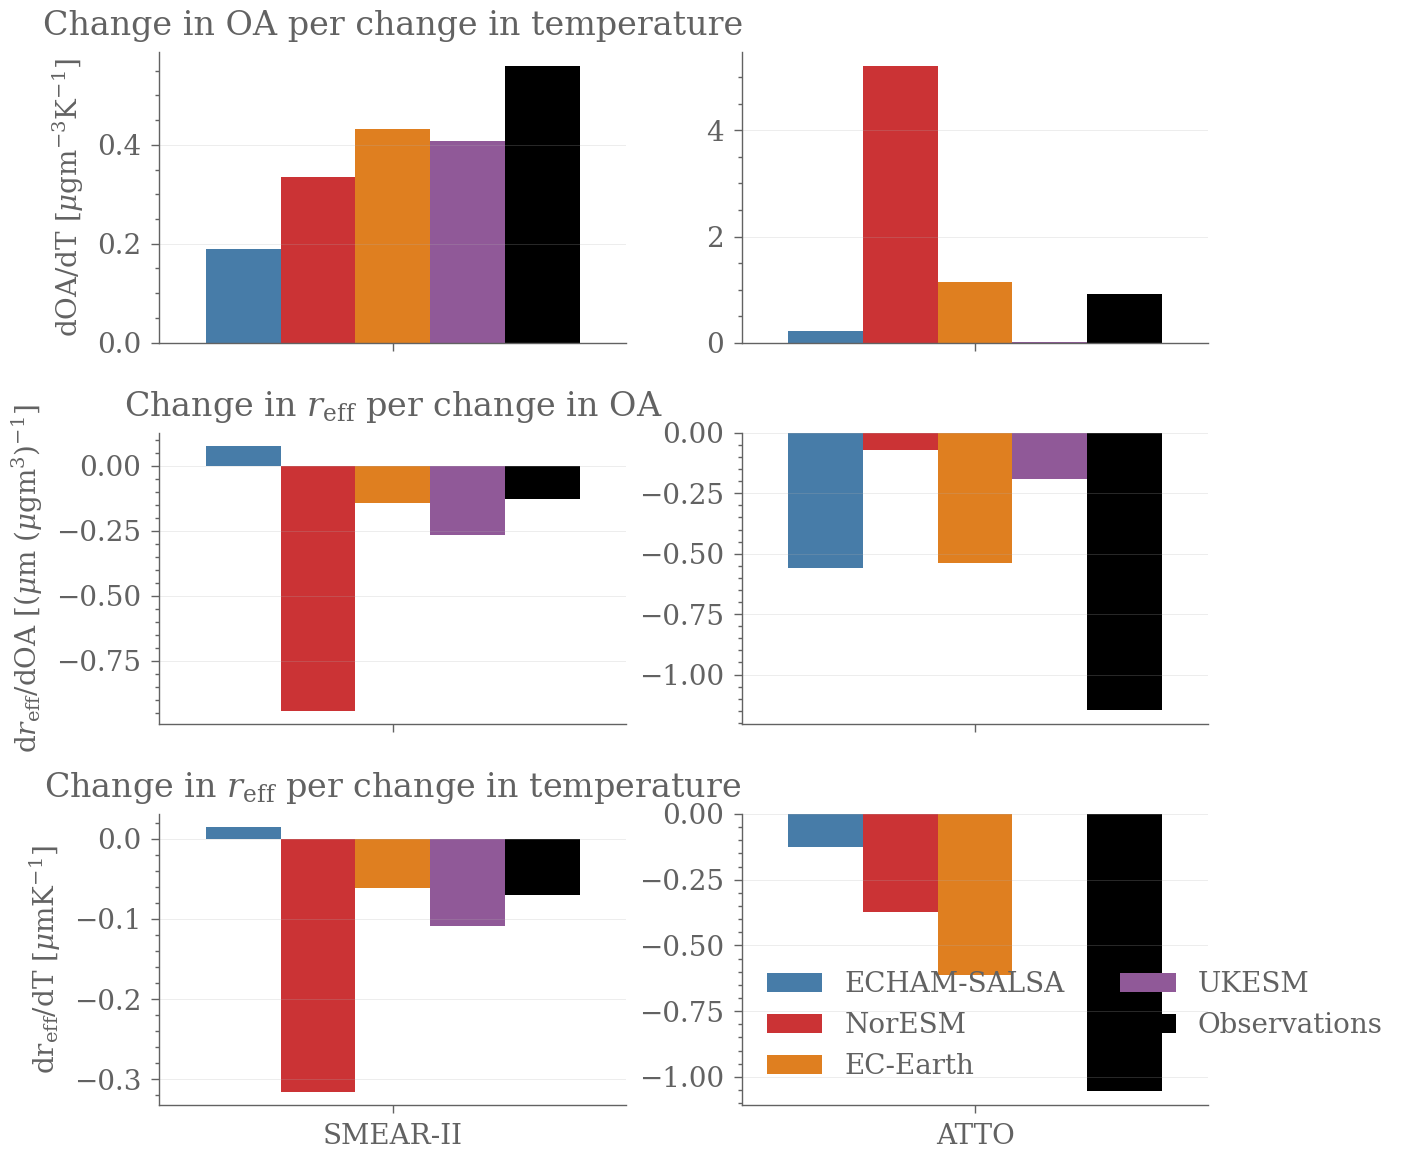

In [81]:
fig, axs = plt.subplots(3,2, figsize=[7,6], sharex='col')
for st, ax in zip(['SMR','ATTO'],axs[0,:]):
    _df = df_together[df_together['station']==dic_station2nicename[st]]
    g = sns.barplot(y='dOA/dT', x='station', hue='Source', 
            data= _df, palette=cols, ax = ax, )
for st, ax in zip(['SMR','ATTO'],axs[1,:]):
    _df = df_together[df_together['station']==dic_station2nicename[st]]
    sns.barplot(y='dr_eff/dOA', x='station', hue='Source', 
            data= _df, palette=cols, ax = ax)
for st, ax in zip(['SMR','ATTO'],axs[2,:]):
    _df = df_together[df_together['station']==dic_station2nicename[st]]
    
    sns.barplot(y='dr_eff/dT',x='station', hue='Source', 
            data= _df, palette=cols, ax = ax)

#l = axs[0].get_legend().draw_frame(False)

for ax in axs.flatten():
    ax.get_legend().set_visible(False)

axs.flatten()[-1].legend( ncol = 2, frameon=False)
    
for ax in axs.flatten():
    ax.grid(axis='y', linewidth=.2, alpha=.4)
    ax.set_xlabel('')
    

axs[0,0].set_title('Change in OA per change in temperature')
axs[1,0].set_title('Change in $r_{\mathrm{eff}}$ per change in OA')
axs[2,0].set_title('Change in $r_{\mathrm{eff}}$ per change in temperature')

axs[0,0].set_ylabel('dOA/dT [$\mu$gm$^{-3}$K$^{-1}$]')
axs[1,0].set_ylabel('d$r_{\mathrm{eff}}$/dOA [($\mu$m ($\mu$gm$^{3}$)$^{-1}$]')
#axs[2,0].set_ylabel('d$r_{eff}$/dT [K$^{-1}$]')
axs[2,0].set_ylabel('dr$_{\mathrm{eff}}$/dT [$\mu$mK$^{-1}$]')

axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')
axs[2,1].set_ylabel('')







fn = make_fn('r_eff2T',season_smr, season_atto,comment='whole_feedback_comparison')
print(fn)
fig.tight_layout()
sns.despine(fig)
fig.savefig(fn.with_suffix('.pdf'))
#axs[0].set_title('Organic aerosol per change in temperature')

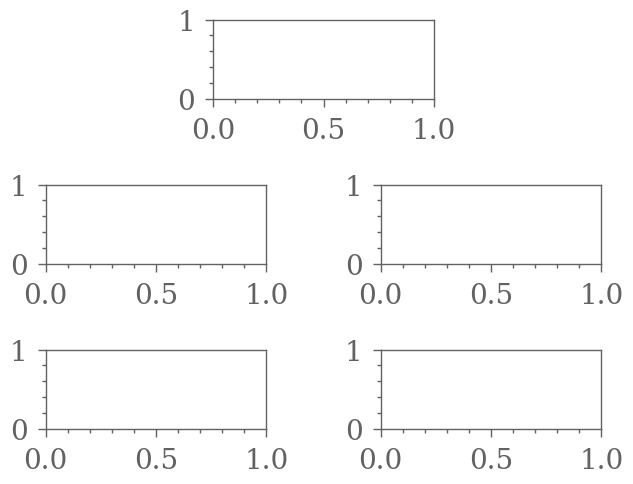

In [82]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
fig = plt.figure()

gs1 = GridSpec(3, 4,)# left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[0, 1:-1])
ax2 = fig.add_subplot(gs1[1, :2])
ax3 = fig.add_subplot(gs1[2, :2])
axs_left = [ax2,ax3]
ax4 = fig.add_subplot(gs1[1, 2:])
ax5 = fig.add_subplot(gs1[2, 2:])
axs_right = [ax4,ax5]
plt.tight_layout()


Plots/delta_percentile_JA_FMA_COTr_eff2Twhole_feedback_comparison.png


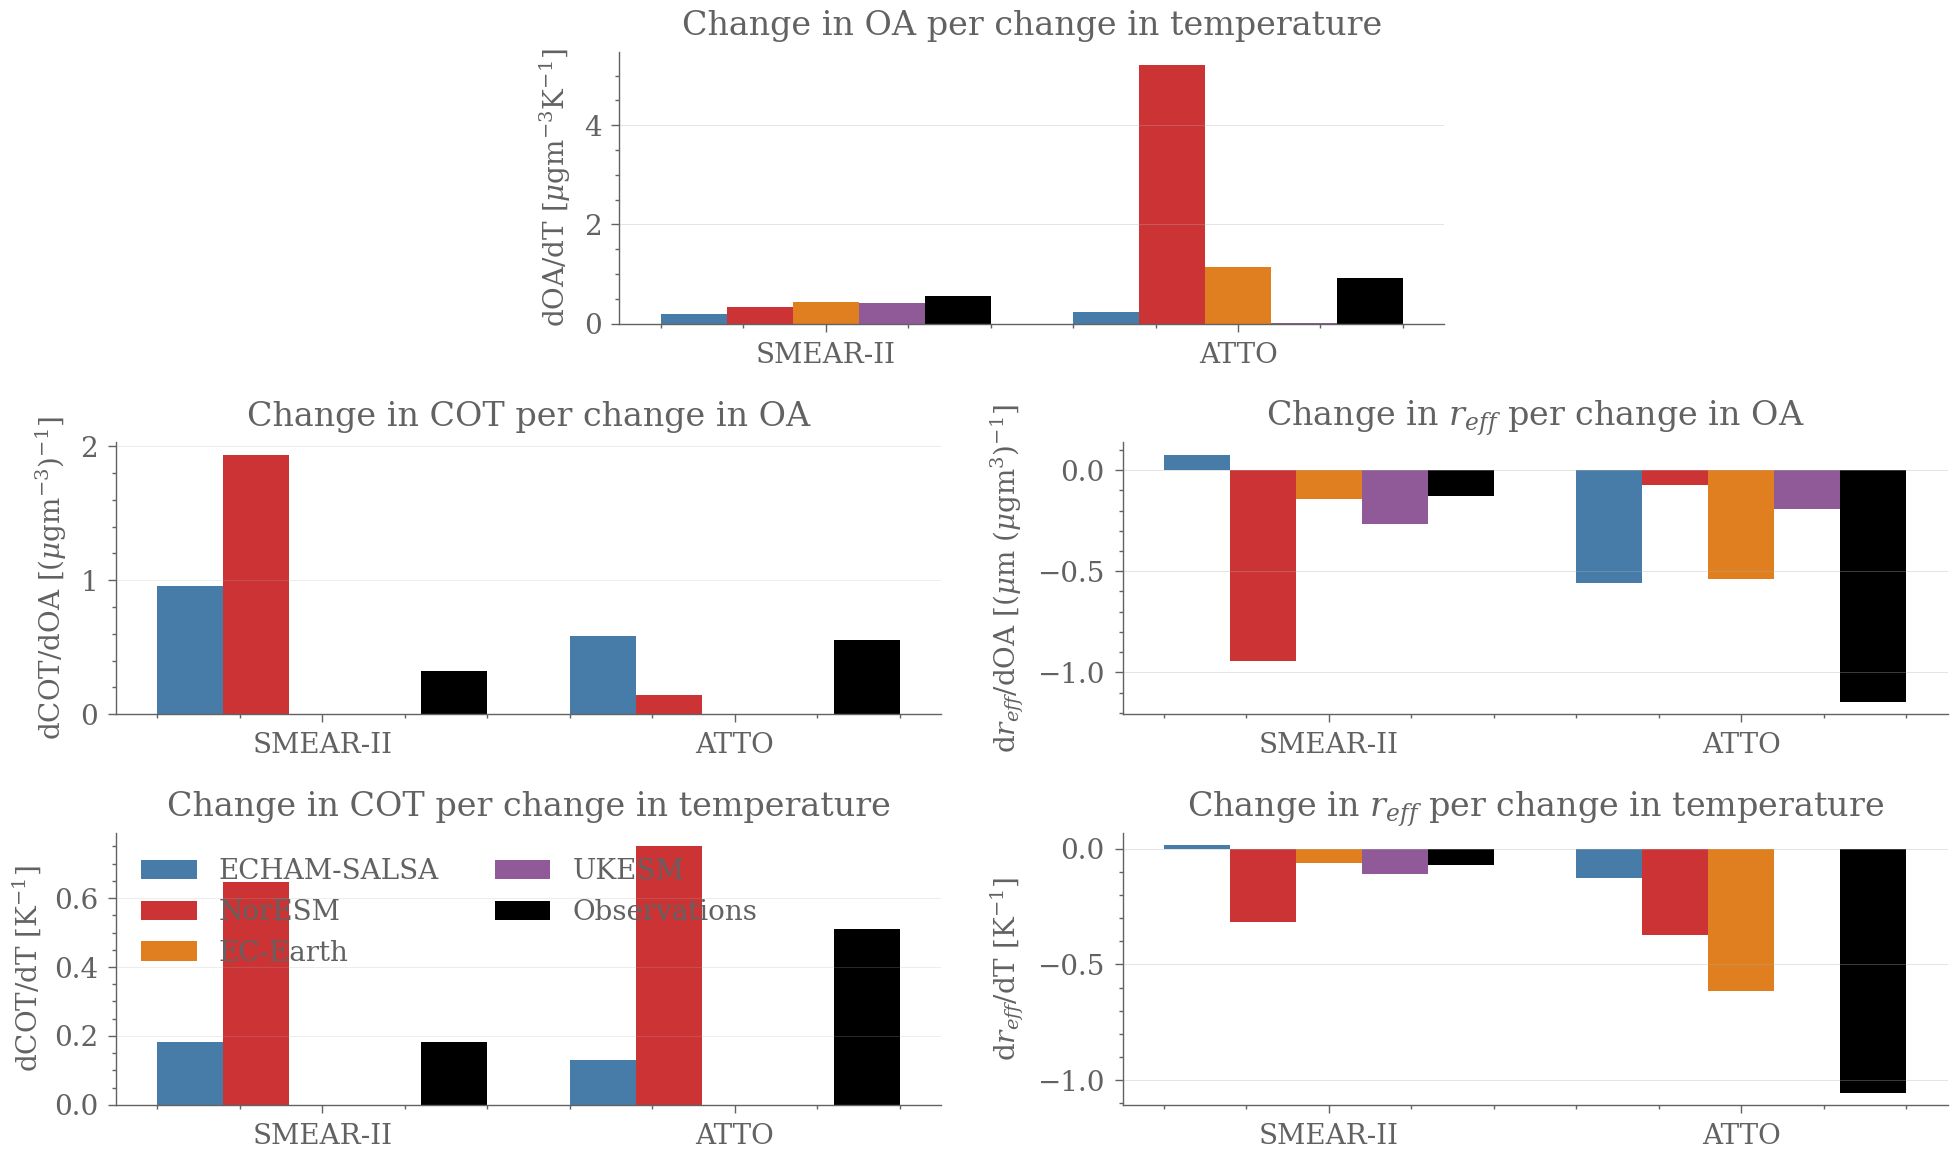

In [83]:
#fig, axs_sup = plt.subplots(3,2, figsize=[10,6], sharex=True)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=[10,6], )

gs1 = GridSpec(3, 4,)# left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[0, 1:-1])
ax2 = fig.add_subplot(gs1[1, :2])
ax3 = fig.add_subplot(gs1[2, :2])
axs_left = [ax1, ax2,ax3]
ax4 = fig.add_subplot(gs1[1, 2:])
ax5 = fig.add_subplot(gs1[2, 2:])
axs_right = [ax1,ax4,ax5]
plt.tight_layout()








axs = axs_left
g = sns.barplot(y='dOA/dT', x='station', hue='Source', 
            data= df_together, palette=cols, ax = ax1, )
sns.barplot(y='dCOT/dOA', x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[1])
sns.barplot(y='dCOT/dT',x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[2])

#l = axs[0].get_legend().draw_frame(False)
axs[-1].legend( ncol = 2, frameon=False)

for ax in axs[:-1]:
    ax.get_legend().set_visible(False)

    
for ax in axs:
    ax.grid(axis='y', linewidth=.2, alpha=.4)
    ax.set_xlabel('')
    
axs[0].set_title('Change in OA per change in temperature')
axs[1].set_title('Change in COT per change in OA')
axs[2].set_title('Change in COT per change in temperature')

axs[0].set_ylabel('dOA/dT [$\mu$gm$^{-3}$K$^{-1}$]')
axs[1].set_ylabel('dCOT/dOA [($\mu$gm$^{-3}$)$^{-1}$]')
axs[2].set_ylabel('dCOT/dT [K$^{-1}$]')




### SECOND ROW:
axs = axs_right

g = sns.barplot(y='dOA/dT', x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[0], )
sns.barplot(y='dr_eff/dOA', x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[1])
sns.barplot(y='dr_eff/dT',x='station', hue='Source', 
            data= df_together, palette=cols, ax = axs[2])

#l = axs[0].get_legend().draw_frame(False)
axs[-1].legend( ncol = 2, frameon=False)

for ax in axs[:]:
    ax.get_legend().set_visible(False)

    
for ax in axs:
    ax.grid(axis='y', linewidth=.2, alpha=.6)
    ax.set_xlabel('')
    
axs[0].set_title('Change in OA per change in temperature')
axs[1].set_title('Change in $r_{eff}$ per change in OA')
axs[2].set_title('Change in $r_{eff}$ per change in temperature')

axs[0].set_ylabel('dOA/dT [$\mu$gm$^{-3}$K$^{-1}$]')
axs[1].set_ylabel('d$r_{eff}$/dOA [($\mu$m ($\mu$gm$^{3}$)$^{-1}$]')
axs[2].set_ylabel('d$r_{eff}$/dT [K$^{-1}$]')










fn = make_fn('COTr_eff2T',season_smr, season_atto,comment='whole_feedback_comparison')
print(fn)
fig.tight_layout()
sns.despine(fig)
fig.savefig(fn.with_suffix('.pdf'))
#axs[0].set_title('Organic aerosol per change in temperature')